# SIIT Project1 MLP: Pima-Diabetes-Classification


## Format:
The Pima Indian Diabetics Dataset is in a structured tabular format. The dataset is available on Kaggle in the CSV (Comma-Seperated-Values) file format. The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Each data entries or rows in the dataset represents an individual, whereas each columns represents attributes related to the subject health like glucose level, blood pressure, etc. For the features, most of them are integer values with exception to "BMI" and "DiabetesPedigreeFunction" that are floating-point value.

TALK ABOUT THE OBJECTIVE OF THE DATASET SOMEWHERE?

## Volume:
The dataset consisted of 768 instances, which is considerd to be moderate number of subjects. Each instance comes with a set of medical measurements (like including glucose level, blood pressure, and BMI) and a target varialbe called Outcome that indicate whether the subject has diabetic or not. If the value in the Outcome column reads 0, then the person doesn't have diabetics; otherwise, the person with diabetic will have Outcome column reads 1.

## Quality:
Given the statistical analysis, a very intriguing question arises. Is it possible for the columns including "Glucose", "BloodPressure", "SkinThickness", "Insulin", and "BMI" to have minimum value of zero? In this setting, the value of zero doesn't make sense. For example, a person with BMI means a person weight zero kilogram, which is impossible. We speculate that these instances were treated as missing value (replace with zero) or recording error from human mannual data entry. In order to address this problem, we will considered replacing the zero values with either mean or median of the associated column.

We used boxplot to investigate the outlier in the dataset. Using the IQR (Inter-qaurtile Range) outlier detection approach, the data that shown as dot on the boxplot is considered as outlier. We also put multiple text annotations to indicate the number of outlier for each feature.

## Bias:
The bias may arise from the sampling process, data collection methods, and population representation. For instance, the dataset includes specific group of people, the Pima Indians; therefore, the analysis and model's applicability may not be suitable for other population. Henceforth, the prediction model is generalized enough to apply with other diverse setting.

In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import loadtxt
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv" -q
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names" -q
clear_output()

In [3]:
columns_name = [
    "Pregnancies","Glucose","BloodPressure","SkinThickness",
    "Insulin","BMI", "DiabetesPedigreeFunction", "Age",	"Outcome"
]

dataset = loadtxt('/content/pima-indians-diabetes.data.csv', delimiter=',')

df = pd.DataFrame(dataset, columns=columns_name)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
def boxplot_wannotation_plot(df: pd.DataFrame) -> None:
    num_columns = len(df.drop(['Outcome'],axis=1).columns)
    num_rows = (num_columns // 3) + (num_columns % 3)

    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 6 * num_rows // 2))
    axes = axes.flatten()

    for i, col in enumerate(df.drop(['Outcome'],axis=1).columns):
        ax = axes[i]
        boxplot = df[col].plot(kind='box', ax=ax, sharex=False, sharey=False,
                            meanline=True, showmeans =True, meanprops={'color': 'red', 'linestyle': '--'})
        ax.set_title(f'{col}')
        ax.set_xticks([])

        # Calculate the median and mean
        median, mean = df[col].median(), df[col].mean()

        # Mean and Median Annotation
        ax.text(0.62, 0.9, f'Median: {median:.2f}', transform=ax.transAxes,
                fontsize=9, verticalalignment='top',color='green')
        ax.text(0.62, 0.8, f'Mean: {mean:.2f}', transform=ax.transAxes,
                fontsize=9, verticalalignment='top',color='red')

        # Outlier calculation and Annotation
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        ax.text(0.62, 0.7, f'Outliers: {len(outliers)}', transform=ax.transAxes, fontsize=9, verticalalignment='top')

    for i in range(num_columns, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

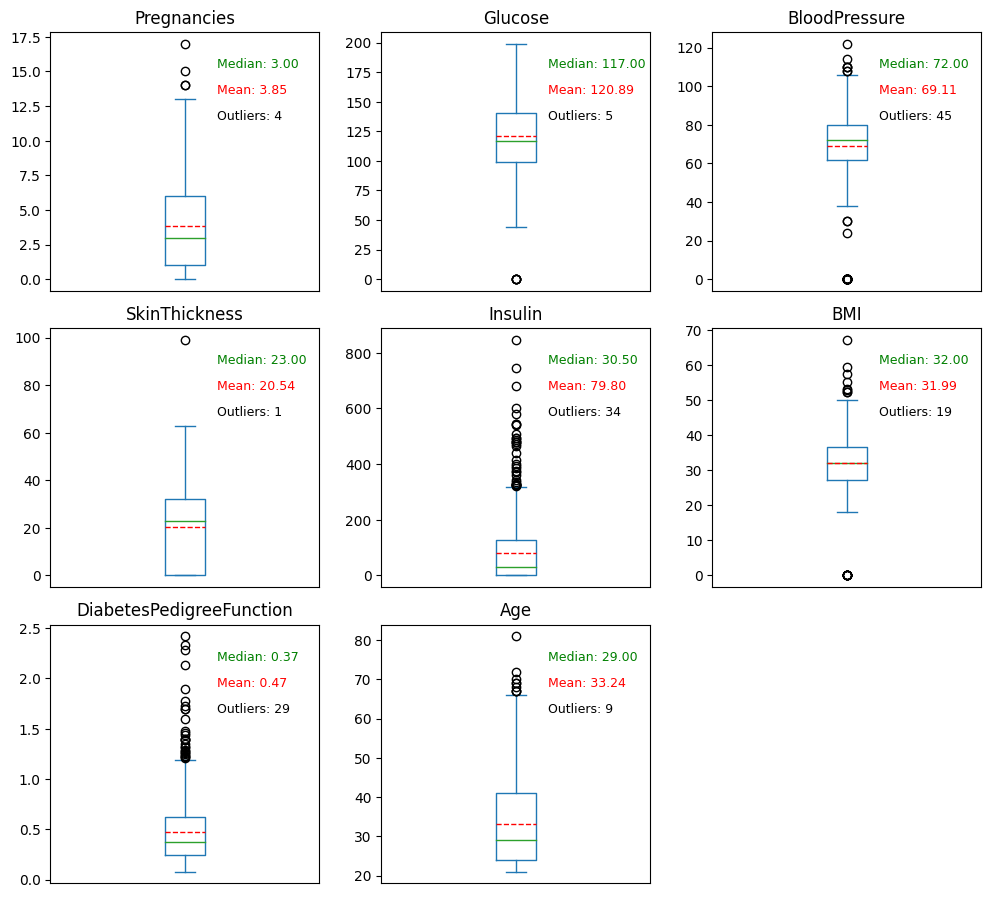

In [7]:
boxplot_wannotation_plot(df)

After plotting each feature using boxplot with annotation, we can identified the precense of outliers in the dataset. Henceforth, we will removed these dataset. The imputation would depends on the distribution of each features. Therefore, we plotted the distribution to observe the characteristic.

In [8]:
def distribution_wannotation_plot(df: pd.DataFrame) -> None:
    num_features = len(df.columns) - 1
    num_rows,num_cols = 3, 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8 * num_rows // 2))
    axes = axes.flatten()

    for i, column in enumerate(df.columns[:-1]):
        ax = axes[i]
        # Plot All the data points
        sns.histplot(data=df, x=column, bins=20, common_norm=False, ax=ax,
                    legend=False, color='orange', alpha=0.2, edgecolor='none')

        # Plot the data points seperated by hue (Outcome)
        sns.histplot(data=df, x=column, hue="Outcome", bins=20, common_norm=False, kde=True,
                    ax=ax, legend=False, palette={0: 'blue', 1: 'red'}, alpha=0.4, edgecolor='none')

        mean = df[column].mean()
        var = df[column].var()
        skew = df[column].skew()

        ax.set_title(f'{column}\n(Mean={mean:.2f}, Var={var:.2f}, Skew={skew:.2f})')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

        # Calculate seperate mean and variance
        mean_0 = df[df['Outcome'] == 0][column].mean()
        mean_1 = df[df['Outcome'] == 1][column].mean()
        var_0 = df[df['Outcome'] == 0][column].std()
        var_1 = df[df['Outcome'] == 1][column].std()

        ax.annotate(f'Mean(0): {mean_0:.2f}', xy=(0.7125, 0.85), xycoords='axes fraction', fontsize=10, color='blue')
        ax.annotate(f'Mean(1): {mean_1:.2f}', xy=(0.7125, 0.75), xycoords='axes fraction', fontsize=10, color='red')
        ax.annotate(f'Std(0): {var_0:.2f}', xy=(0.7125, 0.65), xycoords='axes fraction', fontsize=10, color='blue')
        ax.annotate(f'Std(1): {var_1:.2f}', xy=(0.7125, 0.55), xycoords='axes fraction', fontsize=10, color='red')

        ax.axvline(mean, color='black', linestyle='-.', linewidth=1.5)
        ax.axvline(df[df['Outcome'] == 0][column].mean(), color='blue', linestyle='--', linewidth=1.5)
        ax.axvline(df[df['Outcome'] == 1][column].mean(), color='red', linestyle='--', linewidth=1.5)

    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[i])

    custom_legend = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)
    ]
    legend_labels = ['All the Data', 'Negative Tested', 'Positive Tested']
    legend = fig.legend(custom_legend, legend_labels, loc='lower right', bbox_to_anchor=(1.0, 0.0))
    legend.set_bbox_to_anchor((0.90, 0.15))

    plt.tight_layout()
    plt.show()

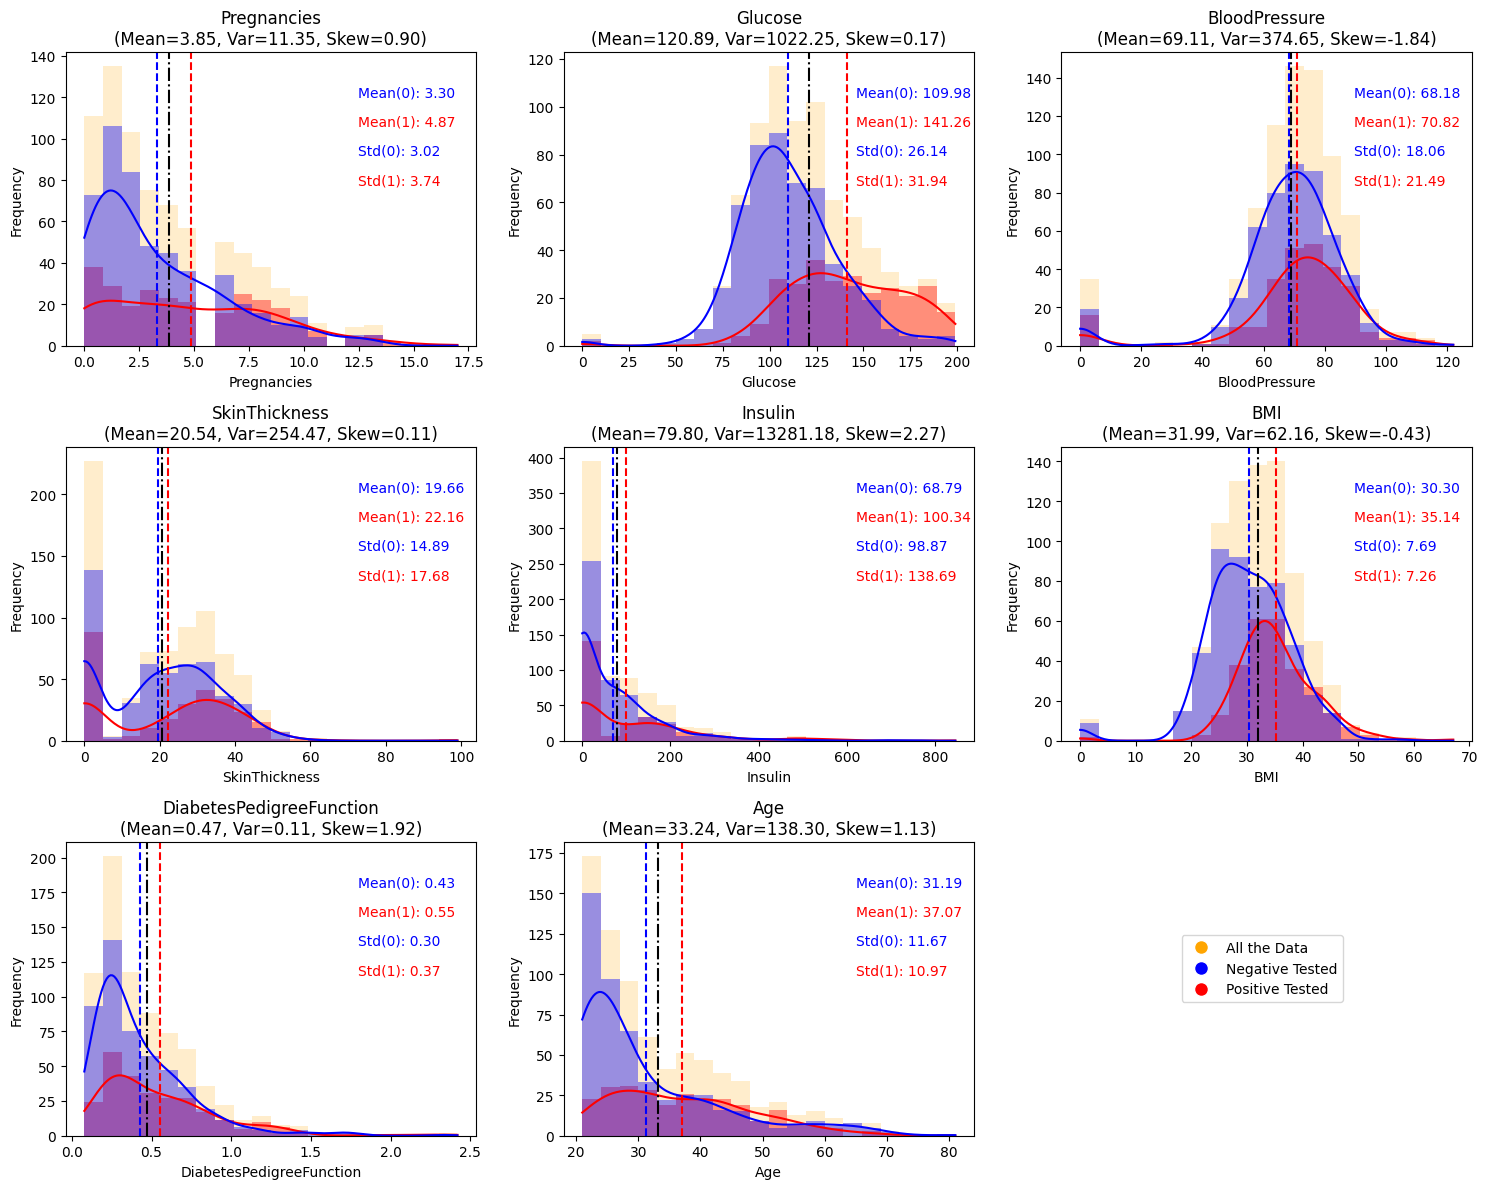

In [9]:
distribution_wannotation_plot(df)

Based on the distribution of each input feature, it's evident that there are two distinct types of distributions:a normal distribution and a positively skewed distribution.

For normal distribution, we can choose to imply mean or average to fill the missing values. Since our data is symmetric, using mean would be appropriate in this scenario.

As for Positively skewed dataset, where the tail extending to the right, most of the values are concentrated on the left-side. Mean wouldn't be appropriate choice here because it is relatively sensitive to outliers. Therefore, consider using the median as the imputation measure because median doesn't get effected by outliers.

In [10]:
def preprocess_outlier_wvisual(
    df: pd.DataFrame,
    feature_name: str,
    impute_with: str = 'median'
) -> pd.DataFrame:

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    sns.boxplot(df[feature_name], ax=axs[0])
    axs[0].set_title(f"{feature_name} (Before)")
    axs[0].annotate(f"Mean: {df[feature_name].mean():.2f}\nMedian: {df[feature_name].median():.2f}",
                    xy=(1, 1), xycoords='axes fraction', ha='right', va='top', fontsize=10, color='purple')

    # Outliers Detection
    q1 = df[feature_name].quantile(0.25)
    q3 = df[feature_name].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr

    temp_df = df[(df[feature_name] >= lower_tail) & (df[feature_name] <= upper_tail)]

    if impute_with == 'mean':
        imputation_value = temp_df[feature_name].mean()
    elif impute_with == 'median':
        imputation_value = temp_df[feature_name].median()

    df[feature_name] = np.where(
        (df[feature_name] < lower_tail) | (df[feature_name] > upper_tail),
        imputation_value,
        df[feature_name]
    )

    sns.boxplot(df[feature_name], ax=axs[1])
    axs[1].set_title(f"{feature_name} (After)")
    axs[1].annotate(f"Mean: {df[feature_name].mean():.2f}\nMedian: {df[feature_name].median():.2f}",
                    xy=(1, 1), xycoords='axes fraction', ha='right', va='top', fontsize=10, color='purple')

    axs[0].axhline(df[feature_name].mean(), color='orange', linestyle='--', linewidth=2.5)
    axs[0].axhline(df[feature_name].median(), color='red', linestyle='--', linewidth=2.5)
    axs[1].axhline(df[feature_name].mean(), color='orange', linestyle='--', linewidth=2.5)
    axs[1].axhline(df[feature_name].median(), color='red', linestyle='--', linewidth=2.5)


    axs[0].set_xticks([])
    axs[1].set_xticks([])

    plt.tight_layout()
    plt.show()

    return df

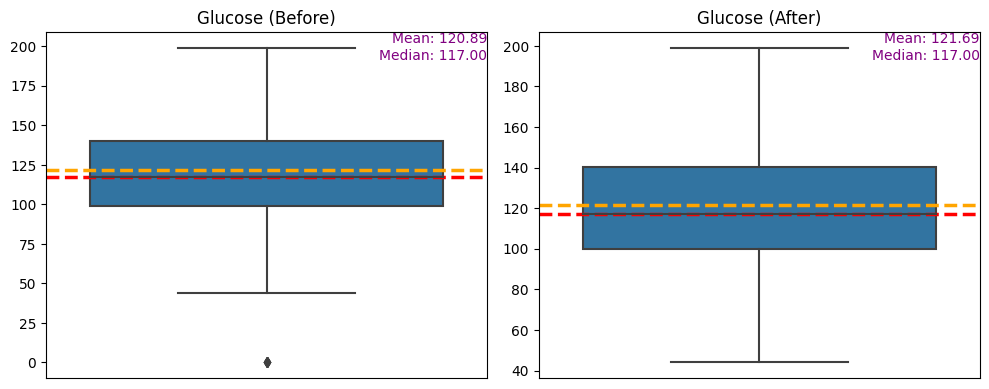

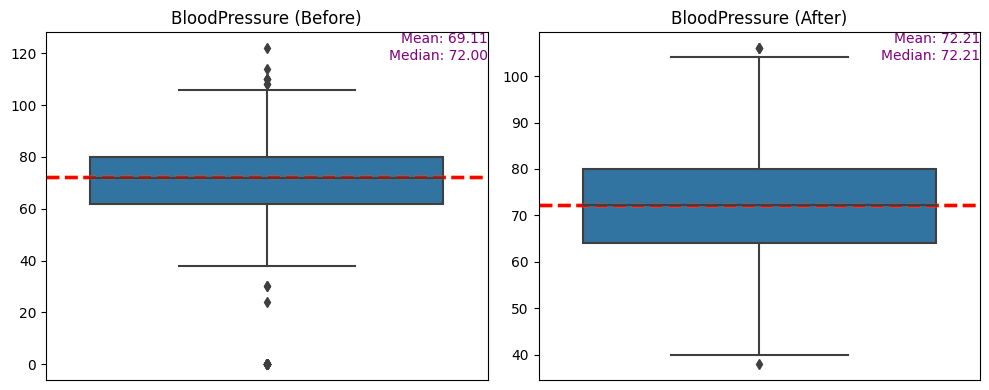

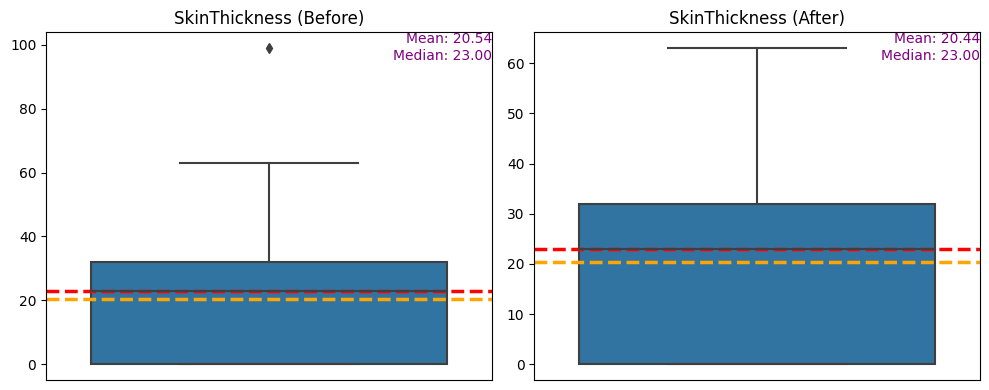

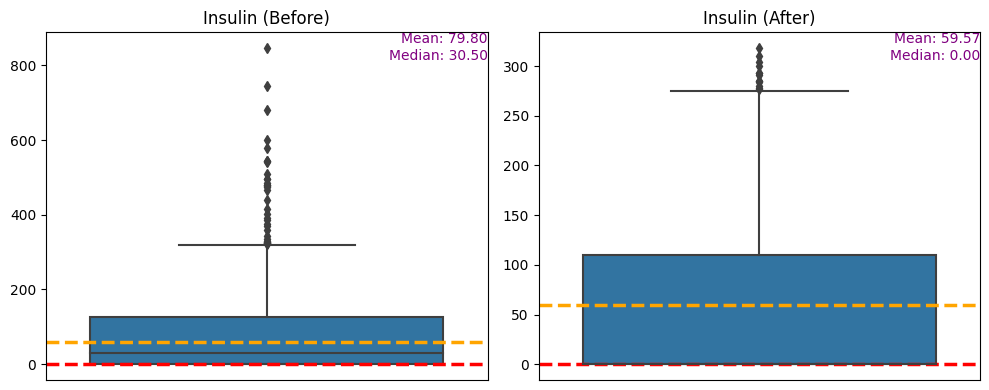

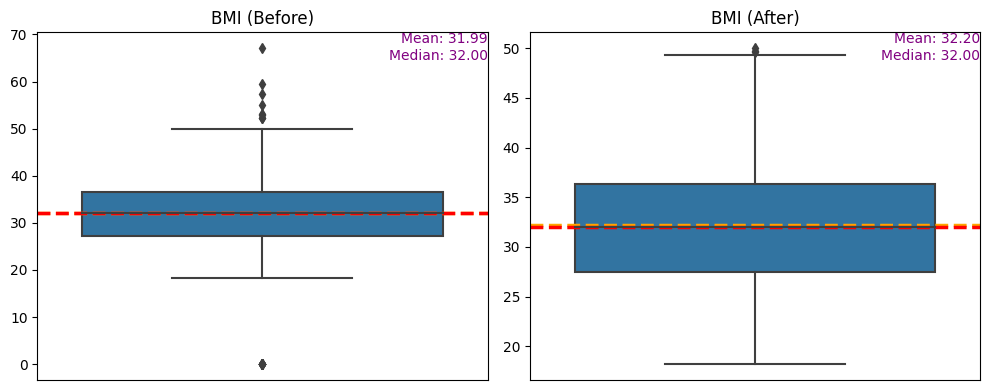

In [11]:
norm_features = ['Glucose','BloodPressure']
pos_skew_features = ['SkinThickness','Insulin','BMI']

df_filtered = df.copy()
columns_to_process = [col for col in df_filtered.columns if col != 'Outcome']

for column in columns_to_process:
    if column in norm_features:
        df_filtered = preprocess_outlier_wvisual(df_filtered, column, 'mean')
    elif column in pos_skew_features:
        df_filtered = preprocess_outlier_wvisual(df_filtered, column, 'median')

In [12]:
inconsistent_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

df_filtered[inconsistent_features] = df_filtered[inconsistent_features].replace(0.0, np.NaN)

# showing the count of Nans
print(f"List of inputs that is missing values:\n{df_filtered.isnull().sum()}")

# Normal Distribution
df_filtered['Glucose'] = df_filtered['Glucose'].fillna(df_filtered['Glucose'].mean())
df_filtered['BloodPressure'] = df_filtered['BloodPressure'].fillna(df_filtered['BloodPressure'].mean())

# Positivly Skewed
df_filtered['SkinThickness'] = df_filtered['SkinThickness'].fillna(df_filtered['SkinThickness'].median())
df_filtered['Insulin'] = df_filtered['Insulin'].fillna(df_filtered['Insulin'].median())
df_filtered['BMI'] = df_filtered['BMI'].fillna(df_filtered['BMI'].median())

# showing the count of Nans
print(f"\nList of inputs aftering imputation:\n{df_filtered.isnull().sum()}")

List of inputs that is missing values:
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     408
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

List of inputs aftering imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
def kda_plots(df:pd.DataFrame) -> None:
    num_rows, num_cols = 3, 3
    num_features = len(df.columns) - 1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8 * num_rows // 2))
    axes = axes.flatten()

    for i, column in enumerate(df.columns[:-1]):
        ax = axes[i]

        # Plot the KDE (Kernel Density Estimation) plot for the entire dataset
        sns.kdeplot(data=df, x=column, ax=ax, color='orange', legend=False, linewidth=2, alpha=0.6)

        # Plot the KDE plot for data points separated by hue (Outcome)
        sns.kdeplot(data=df[df['Outcome'] == 0], x=column, ax=ax, color='blue', label='Negative Tested', linewidth=2, alpha=0.6)
        sns.kdeplot(data=df[df['Outcome'] == 1], x=column, ax=ax, color='red', label='Positive Tested', linewidth=2, alpha=0.6)

        # From the previous graph
        mean = df[column].mean()
        var = df[column].var()
        skew = df[column].skew()

        ax.set_title(f'{column}\n(Mean={mean:.2f}, Var={var:.2f}, Skew={skew:.2f})')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')

        # Calculate seperate mean and variance
        mean_0 = df[df['Outcome'] == 0][column].mean()
        mean_1 = df[df['Outcome'] == 1][column].mean()
        std_0 = df[df['Outcome'] == 0][column].std()
        std_1 = df[df['Outcome'] == 1][column].std()

        ax.annotate(f'Mean(0): {mean_0:.2f}', xy=(0.7125, 0.85), xycoords='axes fraction', fontsize=10, color='blue')
        ax.annotate(f'Mean(1): {mean_1:.2f}', xy=(0.7125, 0.75), xycoords='axes fraction', fontsize=10, color='red')
        ax.annotate(f'Std(0): {std_0:.2f}', xy=(0.7125, 0.65), xycoords='axes fraction', fontsize=10, color='blue')
        ax.annotate(f'Std(1): {std_1:.2f}', xy=(0.7125, 0.55), xycoords='axes fraction', fontsize=10, color='red')


    # Remove remaining empty subplots
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes[i])

    handles, labels = ax.get_legend_handles_labels()
    custom_legend = [
        plt.Line2D([0], [0], color='orange', lw=2, label='All the Data'),
        *handles
    ]
    legend_labels = ['All the Data', *labels]
    legend = fig.legend(custom_legend, legend_labels, loc='lower right', bbox_to_anchor=(1.0, 0.0))
    legend.set_bbox_to_anchor((0.90, 0.15))

    plt.tight_layout()
    plt.show()

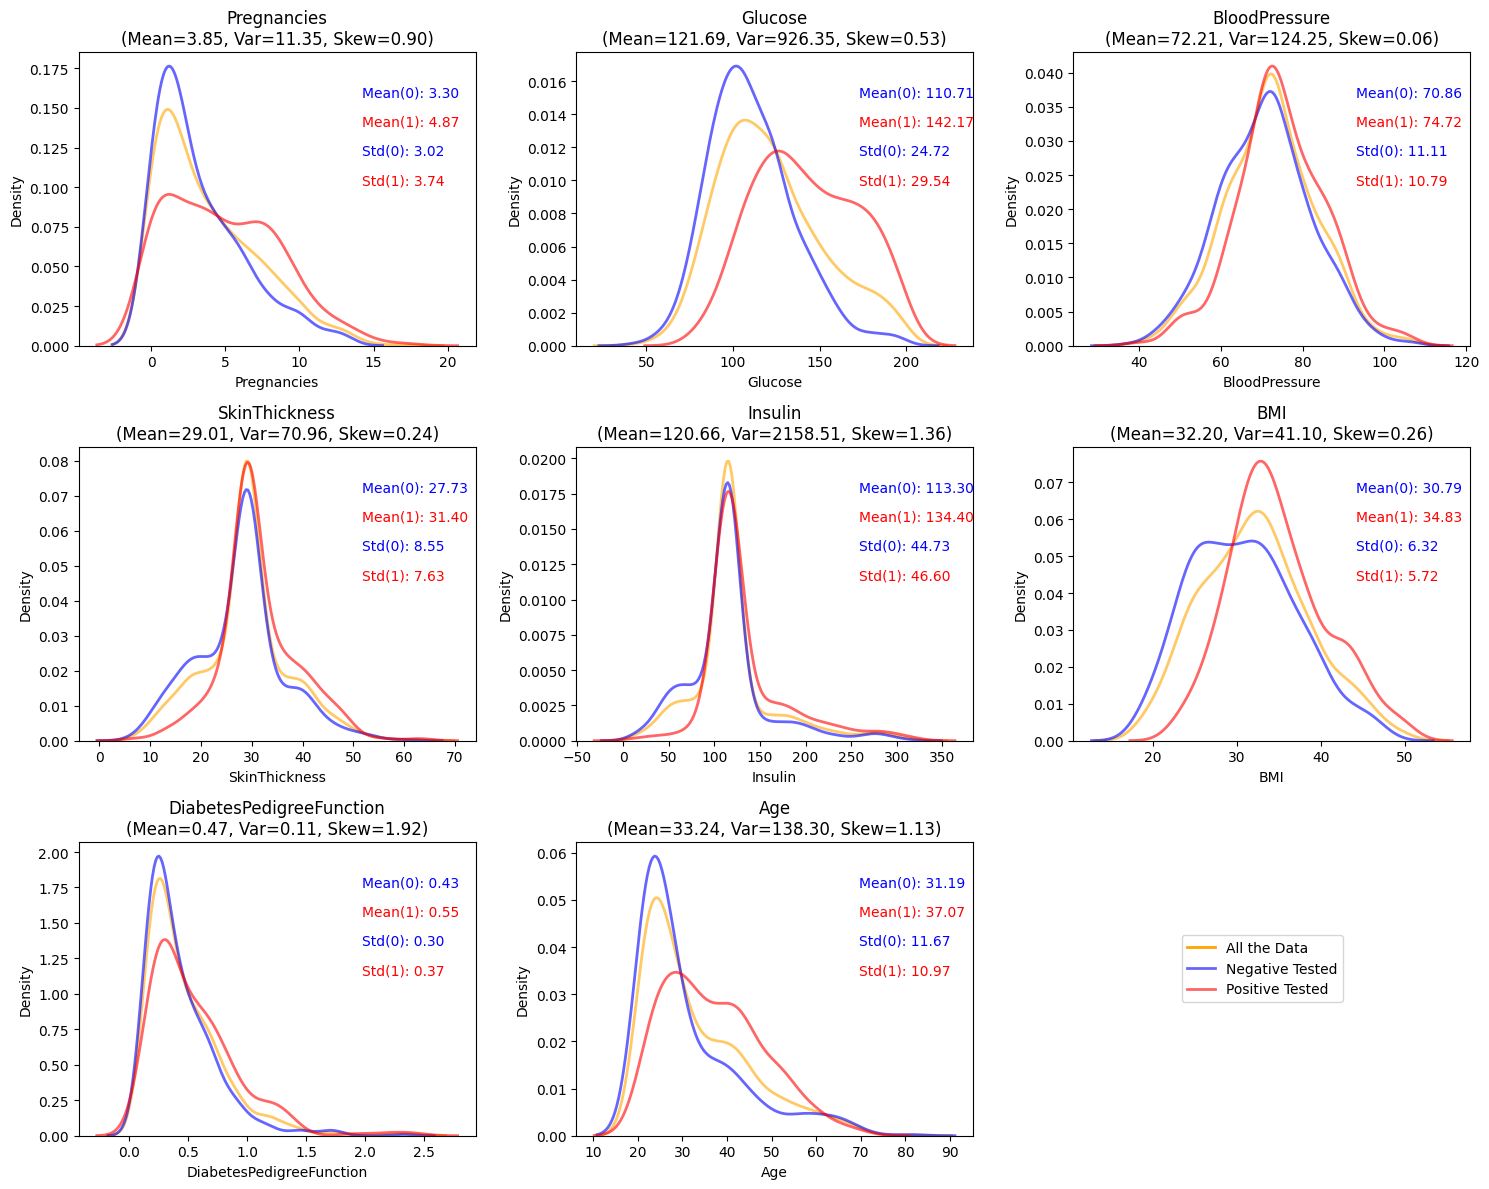

In [14]:
kda_plots(df_filtered)

In [17]:
def outcome_distribution_plot(df: pd.DataFrame) -> None:
    outcome_counts = df['Outcome'].value_counts()

    total_count = outcome_counts.sum()

    plt.figure(figsize=(6, 5))
    bars = plt.bar(x=[0, 1], height=outcome_counts, color=['blue', 'red'], alpha=0.7)
    plt.title('Frequency of Test Outcome (Positive vs. Negative)')
    plt.xlabel('Outcome')
    plt.ylabel('Frequency')
    plt.xticks([0, 1], ['Negative Tested (0)', 'Positive Tested (1)'], rotation=0)

    # Customize the labels inside the bars
    for i, (count, percentage) in enumerate(zip(outcome_counts, outcome_counts / total_count * 100)):
        plt.text(i, count / 2, f'{count} subjects\n({percentage:.2f}%)', ha='center', va='center',
                fontsize=12, fontweight='bold', color='white')

    plt.show()

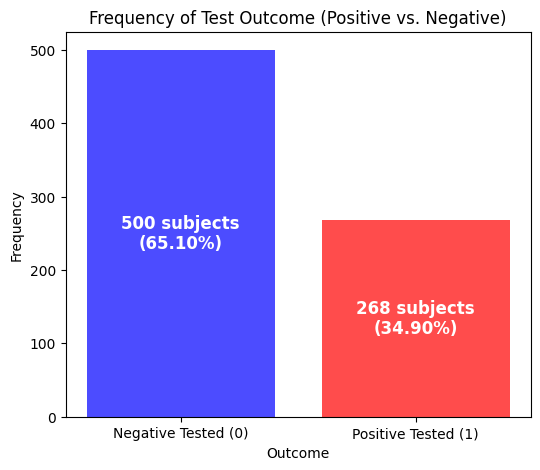

In [18]:
outcome_distribution_plot(df_filtered)

We have to handle the class imbalance before training the model to improve the model accuracy.

# SUSU NA Pupe and Neoy